In [83]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

batch_size = 64
z_dim = 100
learning_rate = 0.0002
num_epochs = 25

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

 <div dir="rtl">
    <p>تولید داده های جدید با استفاده از 
    گن
    </hjson>
    <p>در این پروژه قصد داریم تا با استفاده از شبکه های مولد معماری گن داده های جدیدی از دیتاست مینیست تولید کنیم.</p>
    <p>ابتدا دیتاست مینیست را لود می کنیم و سپس یک شبکه مولد و یک شبکه تشخیص دهنده می سازیم.</p>
    <p>سپس با استفاده از شبکه های مولد و تشخیص دهنده داده های جدید تولید می کنیم.</p>
    <p>در این پروژه از دو نوع معماری برای شبکه های مولد و تشخیص دهنده استفاده می کنیم.</p>
    <p>در معماری اول از شبکه های کانولوشنالی برای شبکه های مولد و تشخیص دهنده استفاده می کنیم.</p>
    <p>در معماری دوم از شبکه های فولی کانکتد برای شبکه های مولد و تشخیص دهنده استفاده می کنیم.</p>
</div>

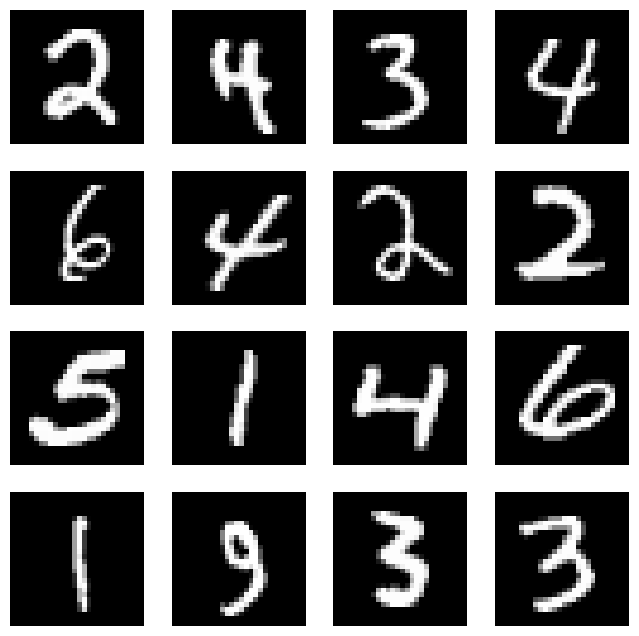

In [84]:
images, labels = next(iter(train_loader))
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i].squeeze().numpy(), cmap='gray')
    plt.axis('off')
plt.show()

<div dir="rtl">
    <p>عکس‌های موجود در دیتاست به این صورت است</p>
</div>

<div dir="rtl">
    <p>ابتدا هایپرپارامترهارا در ابتدا مشخص کردیم .</p>
</div>

<div dir="rtl">
    <p>معماری اول: استفاده از شبکه های کانولوشنالی</p>
    <p> برای تعریف مدل گن به مولد و تشخیص دهنده احتیاج داریم </p>
    <p> مولد باید طوری لرن شود که تصاویری نزدیک به تصاویر واقعی تولید کند </p>
    <p> تشخیص دهنده باید تصاویر واقعی را از تصاویر تولید شده تشخیص دهد </p>
    <p> این دو شبکه به صورت همزمان آموزش داده می شوند </p>
    <p> بنابراین با بهتر شدن تابع لاس مولد تابع لاس تشخیص دهنده باید بدتر شود و بالعکس </p>
    <p> که در ادامه مشاهده می کنید </p>
</div>

<div dir="rtl">
    <p> ابتدا شبکه تشخیص دهنده را تعریف می کنیم </p>
    <p> دلیل استفاده از لایه های کانولوشنالی این است که این لایه ها می توانند ویژگی های مهم تصویر را استخراج کنند </p>
    <p> لایه های شبکه را به ترتیب توضیح می دهیم </p>
    <p> لایه اول یک لایه کانولوشنالی است که یک تصویر 1 در 28 در 28 را گرفته و 32 تصویر 28 در 28 را تولید می کند </p>
    <p> لایه دوم یک لایه فعال سازی است که از نوع لیکی رلو است </p>
    <p> لایه سوم یک لایه مکس پولینگ است که ابعاد تصویر را کاهش می دهد </p>
    <p> لایه چهارم یک لایه کانولوشنالی است که 32 تصویر 28 در 28 را 64 تصویر 14 در 14 تبدیل می کند </p>
    <p> لایه پنجم یک لایه فعال سازی است که از نوع لیکی رلو است </p>
    <p> لایه ششم یک لایه مکس پولینگ است که ابعاد تصویر را کاهش می دهد </p>
    <p> لایه هفتم یک لایه فلتن است که تصویر را به یک بردار تبدیل می کند </p>
    <p> لایه هشتم یک لایه کاملا متصل است که 64 در 7 در 7 را به 1024 تبدیل می کند </p>
    <p> لایه نهم یک لایه فعال سازی است که از نوع لیکی رلو است </p>
    <p> لایه دهم یک لایه کاملا متصل است که 1024 را به 1 تبدیل می کند </p>
    <p> لایه یازدهم یک لایه فعال سازی است که از نوع سیگموید است </p>
    <p> دلیل استفاده از اکیویشن سیگموید این است که خروجی بین 0 و 1 باشد که شبکه بتواند احتمال واقعی بودن تصویر را بدست بیاوریم</p>
    <p> در نهایت تابع فوروارد را تعریف می کنیم که خروجی مدل را با توجه به داده ورودی بدست می‌آورد </p>
</div>
    
    

<div dir="rtl">
    <p> سپس مولد را تعریف می کنیم </p>
    <p> لایه های مولد را به ترتیب توضیح می دهیم </p>
    <p> لایه اول یک لایه کاملا متصل است که 100 را به 1024 تبدیل می کند </p>
    <p> لایه دوم یک لایه فعال سازی است که از نوع رلو است </p>
    <p> لایه سوم یک لایه نرمال سازی است  </p>
    <p> لایه چهارم یک لایه کاملا متصل است که 1024 را به 7 در 7 در 128 تبدیل می کند </p>
    <p> لایه پنجم یک لایه فعال سازی است که از نوع رلو است </p>
    <p> لایه ششم یک لایه نرمال سازی است برای نرمال سازی داده ها </p>
    <p> لایه هفتم یک لایه آنفلتن است که تصویر را به یک بردار 128 در 7 در 7 تبدیل می کند </p>
    <p> لایه هشتم یک لایه کانولوشنالی است که 128 تصویر 7 در 7 را 64 تصویر 14 در 14 تبدیل می کند </p>
    <p> لایه نهم یک لایه فعال سازی است که از نوع رلو است </p>
    <p> لایه دهم یک لای
    ه کانولوشنالی است که 64 تصویر 14 در 14 را 1 تصویر 28 در 28 تبدیل می کند </p>
    <p> لایه یازدهم یک لایه فعال سازی است که از نوع تانژانت هایپربولیک است </p>
    <p> دلیل استفاده از اکیویشن تانژانت هایپربولیک این است که خروجی بین -1 و 1 باشد که تصویر تولید شده بین -1 و 1 باشد </p>
    <p> برای داده های ورودی در دیتا لودر از ترنسفورم استفاده کردیم که داده ها را تبدیل به تنسور میکند
    و سپس داده ها را نرمال(بازه منفی ۱ تا ۱) میکند </p>
    <p> بنابراین برای خروجی مدل باید از تابع تانژانت هایپربولیک استفاده کنیم که داده ها را به بازه منفی ۱ تا ۱ ببرد </p>
    <p> در نهایت تابع فوروارد را تعریف می کنیم که خروجی مدل را با توجه به داده ورودی بدست می‌آورد </p>
</div>

In [85]:
# make GAN model with cnn layers
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.LeakyReLU(0.01),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.LeakyReLU(0.01),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(64*7*7, 1024),
            nn.LeakyReLU(0.01),
            nn.Linear(1024, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)
    
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Linear(1024, 7*7*128),
            nn.ReLU(),
            nn.BatchNorm1d(7*7*128),
            nn.Unflatten(1, (128, 7, 7)),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.model(x)

<div dir="rtl">
    <p> تابع لاس و اپتیمایزر را تعریف می کنیم </p>
    <p> تابع لاس باینری کراس انتروپی است که برای مسائل دو دسته ای استفاده می شود </p>
    <p> اپتیمایزر آدام است که یک روش بهینه سازی است  </p>
    <p> دلیل استفاده از باینری کراس انتروپی این است که می خواهیم تصویر واقعی را از تصویر تولید شده تشخیص دهیم </p>
    <p> مسئله ما یک مسئله دو دسته ای است که باینری کراس انتروپی برای آن مناسب است </p>
</div>

<div dir="rtl">
    <p> برای تسریع عملیات ها کد را روی جی پی یو ران میکنیم</p>
    <p> که با توجه به دستگاه مورد استفاده خودم از ام پی اس استفاده کردم</p>
    <p> مشاهده کردم که روند یادگیری مدل بسیار سریع تر از قبل است</p>
</div>

<div dir="rtl">
    <p> تابع لاس و اپتیمایزر را تعریف می کنیم </p>
    <p> بالاتر تایع لاس انتهاب شده و اپتیمایزر را توضبخ دادم </p>
    <p> هر اپتیمایزر پارامترهای خود را دارد </p>
    <p> سپس مدل را آموزش می دهیم </p>
    <p> برای هر ایپاک یک لوپ برای هر بچ از دیتاست داریم </p>
    <h2>train discriminator <h2>
    <p> ابتدا تصاویر واقعی را به مدل می دهیم و خروجی های مدل را با لیبل های واقعی که یک هستند مقایسه می کنیم </p>
    <p> انتظار داریم که تشخیص دهنده درست تشخیص دهد پس و خروجی مدل را با برداری که همه درایه های ان یک هستند مقایسه میکنیم </p>
    <p> سپس روی پارامترهای تشخیص دهنده بکوارد میزنیم </p>
    <p> سپس تصاویر تولید شده را از مولد می گیریم و خروجی های مدل را با لیبل های تقلبی که همگی ۰ هستند مقایسه می کنیم </p>
    <p> انتظار داریم مدل خروجی ۰ را برای این داده ها بدهد پس خروحی مدل برای داده های تقلبی را با برداری که همگی ان ۰ هستند مقایسه میکنیم </p>
    <p> سپس دوباره با توجه به مفدار لاس برای تصاویر تقلبی روی پارامترهای تشخیص دهنده بک وارد میزنیم </p>
    <p> این کار را بدون ۰ کردن گرادیان های محاسبه شده انجام میدهیم بنابراین شبکه درست اپدیت میشود </p>
    <p> درواقع گرادیان های جدید بدست امده با مقداری که در بکوارد قبلی (روی تصاویر واقعی) بدست امده بود جمع میشوند </p>
    <p> مقدار لاس کل که برابر جمع مقدار لاس برای تساویر واقعی و فیک هست برای چاپ کردن در خروجیست و گرادیان ها به ازای این دو مقدار بالاتر حساب شده </p>
    <h2> train Generator <h2>
    <p> توجه کنید که قبل از بکوارد زدن روی گرادیان ها باید آنها را صفر کنیم </p>
    <p> برای تشحیض دهنده قبل از بکوارد زدن روی گرادیان ها یکبار آن را صفر می کنیم </p>
    <p> برای مولد چون گراف محاسباتی آن به تشخیص دهنده وابسته است ابتدا گرادیان های تشخیص دهنده را صفر می کنیم </p>
    <p> گراف محاسباتی مولد به تشخیص دهنده وابسته است چون میخواهیم تشحیص دهنده نتواند تصویر تولید شده را حدس بزند </p>
    <p> حال چون ابتدا گرادیان های تشحیص دهنده را اپدیت کردیم مقادیری روی پارامترها موجود است پس باید ابتدا انها را ۰ کنیم </p>
    <p> سپس گرادیان های مولد را بکوارد می زنیم </p>
    <p> مقدار لاس جنریتور برابر با خروجی تشخیص دهنده برای تصویر تولید شده در مقایسه با بردار ۱ است چون انتظار داریم شبکه </p>
                                                                                                                     <p>بتواند تصاویری تولیذ کند که تشخیص دهنده نتواند تشخیص دهد که فیک هستند درواقع دوست داریم که خروجی تشخیص دهنده برای تصاویر تولید شده ۱ باشد </p>
    
</div>

tensor([1.], device='mps:0')
Epoch [1/25], Step [200/938], d_loss: 0.4392, g_loss: 4.9980, D(x): 0.83, D(G(z)): 0.12
Epoch [1/25], Step [400/938], d_loss: 0.3326, g_loss: 5.6686, D(x): 0.83, D(G(z)): 0.09
Epoch [1/25], Step [600/938], d_loss: 0.4870, g_loss: 3.6781, D(x): 0.91, D(G(z)): 0.25
Epoch [1/25], Step [800/938], d_loss: 0.4649, g_loss: 3.4555, D(x): 0.90, D(G(z)): 0.22


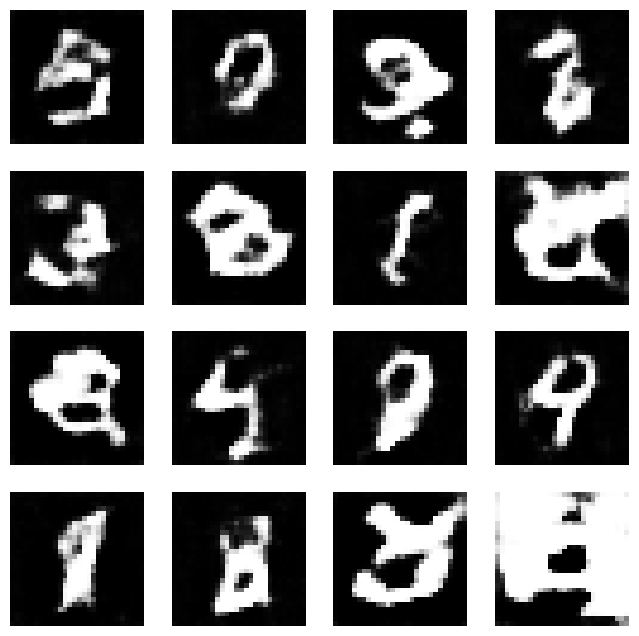

Epoch [2/25], Step [200/938], d_loss: 0.4839, g_loss: 4.8749, D(x): 0.91, D(G(z)): 0.24
Epoch [2/25], Step [400/938], d_loss: 0.4240, g_loss: 3.6558, D(x): 0.82, D(G(z)): 0.10
Epoch [2/25], Step [600/938], d_loss: 0.6579, g_loss: 2.4660, D(x): 0.91, D(G(z)): 0.32
Epoch [2/25], Step [800/938], d_loss: 0.6935, g_loss: 3.0914, D(x): 0.67, D(G(z)): 0.05


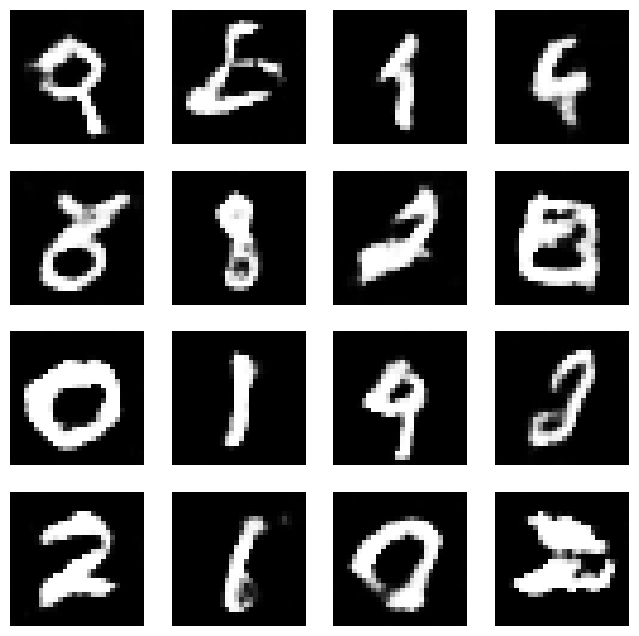

Epoch [3/25], Step [200/938], d_loss: 0.5928, g_loss: 2.2253, D(x): 0.71, D(G(z)): 0.12
Epoch [3/25], Step [400/938], d_loss: 0.8792, g_loss: 1.6942, D(x): 0.60, D(G(z)): 0.13
Epoch [3/25], Step [600/938], d_loss: 0.7170, g_loss: 2.0426, D(x): 0.74, D(G(z)): 0.23
Epoch [3/25], Step [800/938], d_loss: 0.7356, g_loss: 2.2728, D(x): 0.77, D(G(z)): 0.24


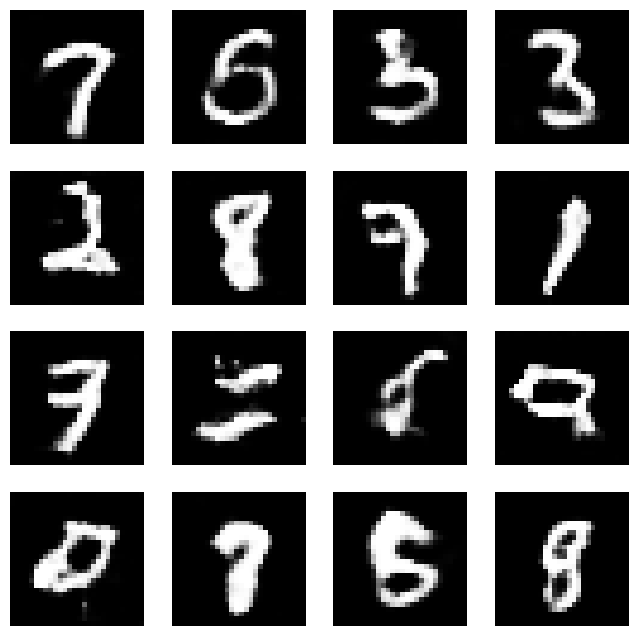

Epoch [4/25], Step [200/938], d_loss: 0.7924, g_loss: 1.9949, D(x): 0.71, D(G(z)): 0.23
Epoch [4/25], Step [400/938], d_loss: 0.7171, g_loss: 1.7161, D(x): 0.73, D(G(z)): 0.20
Epoch [4/25], Step [600/938], d_loss: 0.6708, g_loss: 1.9499, D(x): 0.83, D(G(z)): 0.30
Epoch [4/25], Step [800/938], d_loss: 0.7540, g_loss: 1.2987, D(x): 0.81, D(G(z)): 0.32


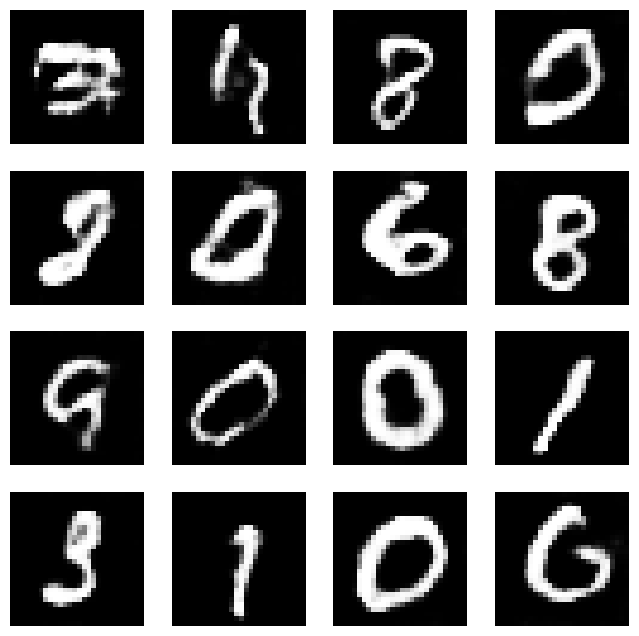

Epoch [5/25], Step [200/938], d_loss: 0.5458, g_loss: 2.0107, D(x): 0.76, D(G(z)): 0.17
Epoch [5/25], Step [400/938], d_loss: 0.6012, g_loss: 2.0100, D(x): 0.80, D(G(z)): 0.20
Epoch [5/25], Step [600/938], d_loss: 0.7316, g_loss: 1.8164, D(x): 0.86, D(G(z)): 0.34
Epoch [5/25], Step [800/938], d_loss: 0.6755, g_loss: 1.7750, D(x): 0.83, D(G(z)): 0.29


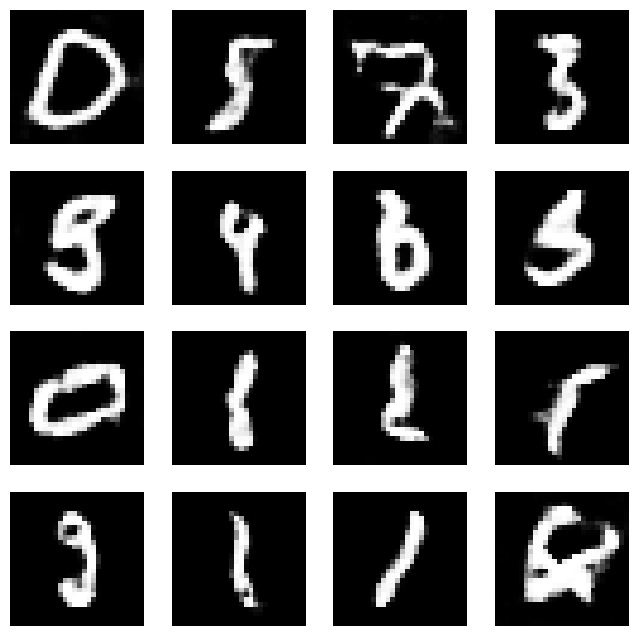

Epoch [6/25], Step [200/938], d_loss: 0.7554, g_loss: 1.5092, D(x): 0.81, D(G(z)): 0.32
Epoch [6/25], Step [400/938], d_loss: 0.8767, g_loss: 2.0069, D(x): 0.64, D(G(z)): 0.21
Epoch [6/25], Step [600/938], d_loss: 0.8646, g_loss: 1.8925, D(x): 0.77, D(G(z)): 0.31
Epoch [6/25], Step [800/938], d_loss: 0.6778, g_loss: 1.9174, D(x): 0.75, D(G(z)): 0.25


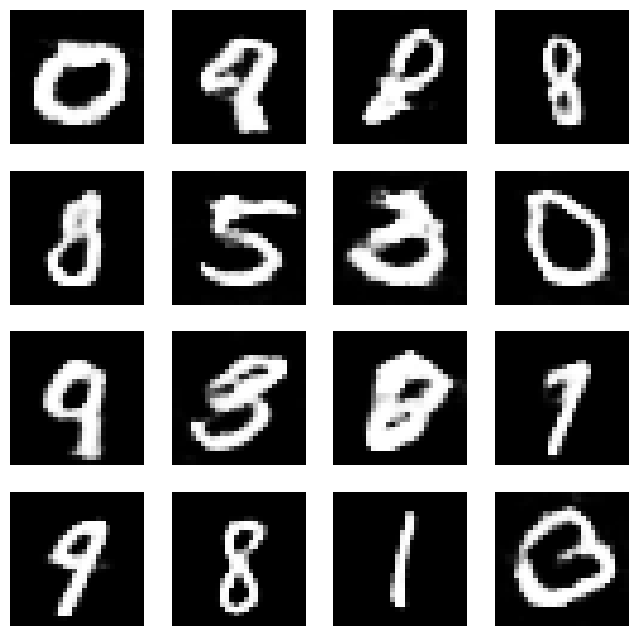

Epoch [7/25], Step [200/938], d_loss: 0.6766, g_loss: 2.0529, D(x): 0.77, D(G(z)): 0.22
Epoch [7/25], Step [400/938], d_loss: 0.5903, g_loss: 1.9378, D(x): 0.81, D(G(z)): 0.23
Epoch [7/25], Step [600/938], d_loss: 0.7408, g_loss: 2.2151, D(x): 0.66, D(G(z)): 0.14
Epoch [7/25], Step [800/938], d_loss: 0.8111, g_loss: 2.2150, D(x): 0.80, D(G(z)): 0.32


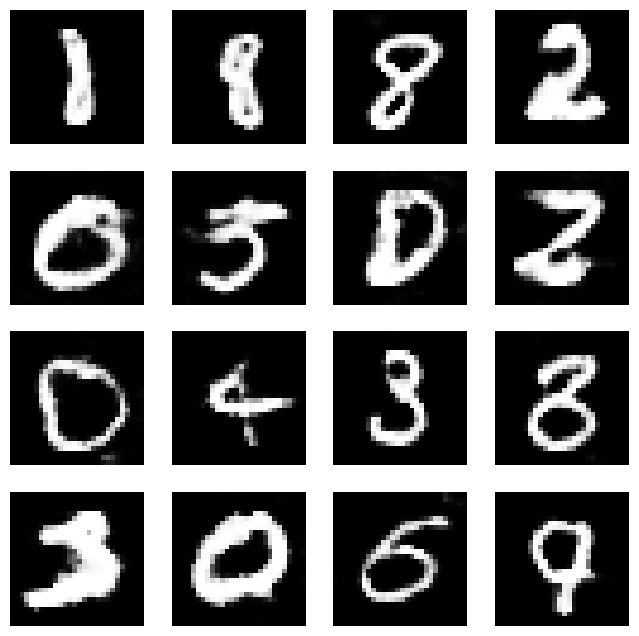

Epoch [8/25], Step [200/938], d_loss: 0.7970, g_loss: 1.6102, D(x): 0.74, D(G(z)): 0.27
Epoch [8/25], Step [400/938], d_loss: 0.8018, g_loss: 1.5095, D(x): 0.69, D(G(z)): 0.25
Epoch [8/25], Step [600/938], d_loss: 0.8441, g_loss: 1.7096, D(x): 0.74, D(G(z)): 0.30
Epoch [8/25], Step [800/938], d_loss: 0.7349, g_loss: 2.4227, D(x): 0.69, D(G(z)): 0.15


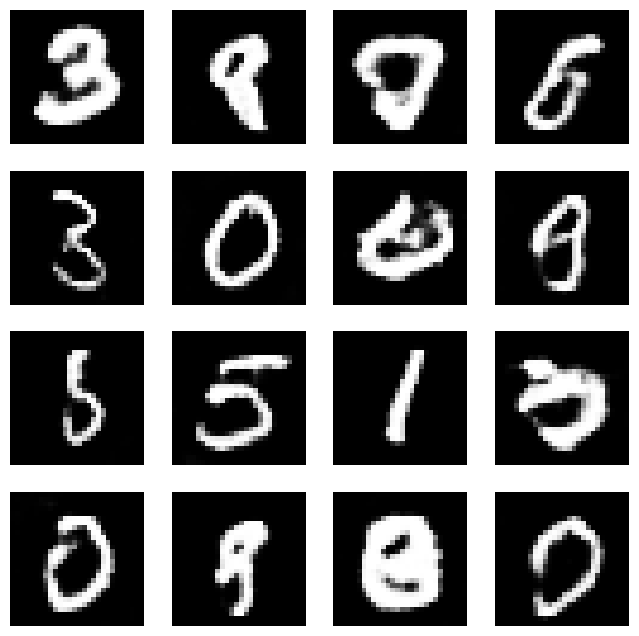

Epoch [9/25], Step [200/938], d_loss: 0.7177, g_loss: 1.7700, D(x): 0.77, D(G(z)): 0.26
Epoch [9/25], Step [400/938], d_loss: 0.6975, g_loss: 1.7380, D(x): 0.76, D(G(z)): 0.27
Epoch [9/25], Step [600/938], d_loss: 0.6984, g_loss: 1.6434, D(x): 0.74, D(G(z)): 0.21
Epoch [9/25], Step [800/938], d_loss: 0.7401, g_loss: 2.1856, D(x): 0.72, D(G(z)): 0.22


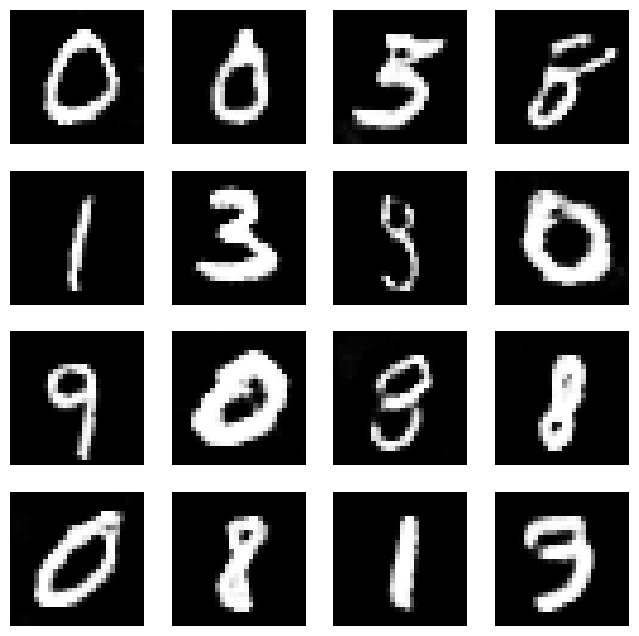

Epoch [10/25], Step [200/938], d_loss: 0.7509, g_loss: 1.6083, D(x): 0.78, D(G(z)): 0.30
Epoch [10/25], Step [400/938], d_loss: 0.7972, g_loss: 1.6594, D(x): 0.76, D(G(z)): 0.29
Epoch [10/25], Step [600/938], d_loss: 0.7702, g_loss: 1.9352, D(x): 0.70, D(G(z)): 0.22
Epoch [10/25], Step [800/938], d_loss: 0.6478, g_loss: 1.9696, D(x): 0.78, D(G(z)): 0.21


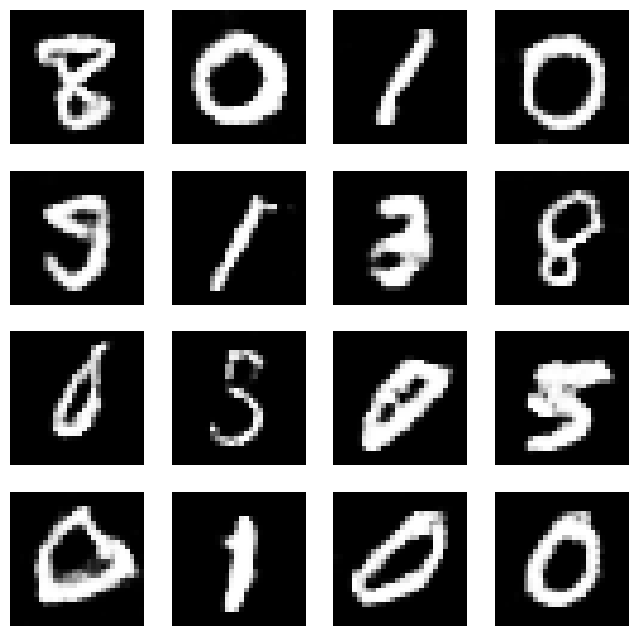

Epoch [11/25], Step [200/938], d_loss: 0.7018, g_loss: 1.5842, D(x): 0.74, D(G(z)): 0.25
Epoch [11/25], Step [400/938], d_loss: 0.7612, g_loss: 2.0860, D(x): 0.79, D(G(z)): 0.29
Epoch [11/25], Step [600/938], d_loss: 0.7099, g_loss: 1.9737, D(x): 0.80, D(G(z)): 0.29
Epoch [11/25], Step [800/938], d_loss: 0.6844, g_loss: 1.7608, D(x): 0.75, D(G(z)): 0.22


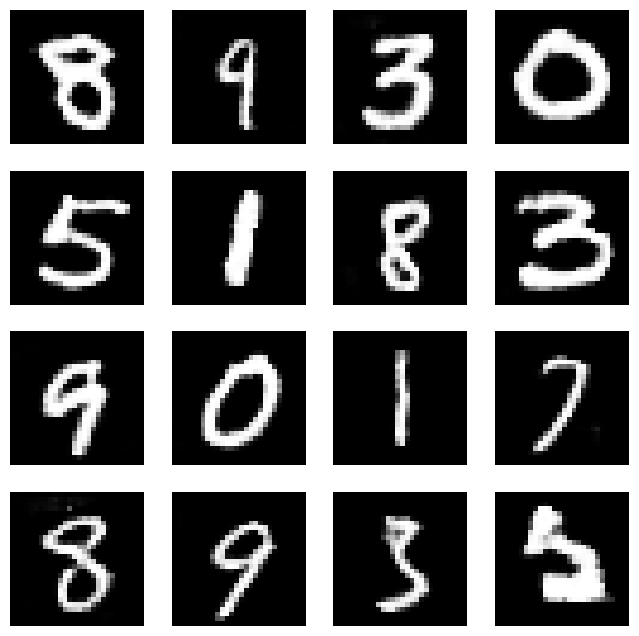

Epoch [12/25], Step [200/938], d_loss: 0.7374, g_loss: 2.3971, D(x): 0.67, D(G(z)): 0.15
Epoch [12/25], Step [400/938], d_loss: 0.9533, g_loss: 1.8517, D(x): 0.65, D(G(z)): 0.22
Epoch [12/25], Step [600/938], d_loss: 0.6010, g_loss: 2.3215, D(x): 0.78, D(G(z)): 0.18
Epoch [12/25], Step [800/938], d_loss: 0.5827, g_loss: 2.1342, D(x): 0.78, D(G(z)): 0.20


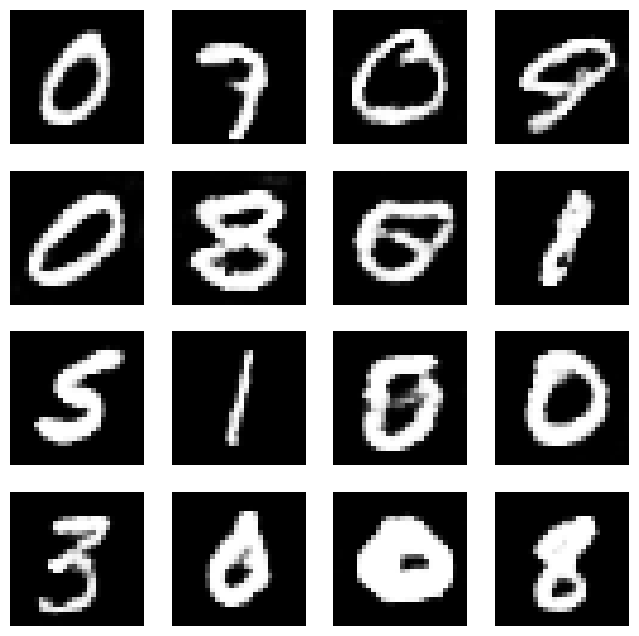

Epoch [13/25], Step [200/938], d_loss: 0.5955, g_loss: 1.8666, D(x): 0.81, D(G(z)): 0.24
Epoch [13/25], Step [400/938], d_loss: 0.6317, g_loss: 1.8763, D(x): 0.73, D(G(z)): 0.18
Epoch [13/25], Step [600/938], d_loss: 0.6376, g_loss: 2.0592, D(x): 0.83, D(G(z)): 0.24
Epoch [13/25], Step [800/938], d_loss: 0.7150, g_loss: 1.5171, D(x): 0.85, D(G(z)): 0.31


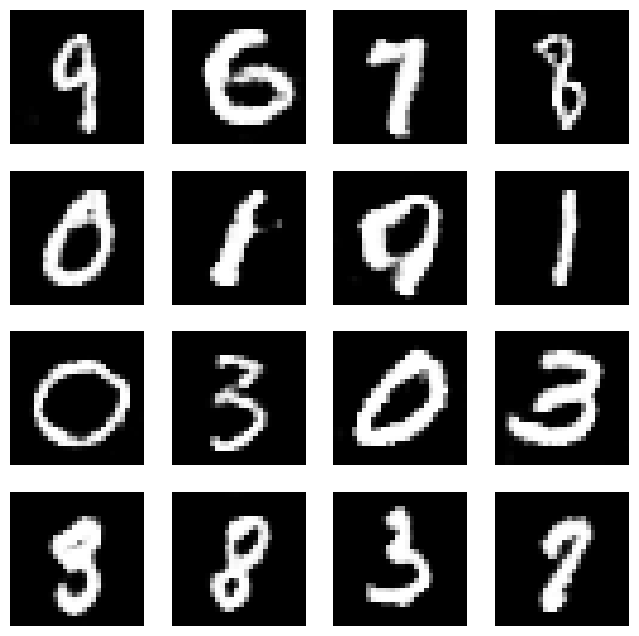

Epoch [14/25], Step [200/938], d_loss: 0.5788, g_loss: 2.0021, D(x): 0.77, D(G(z)): 0.17
Epoch [14/25], Step [400/938], d_loss: 0.6985, g_loss: 1.6033, D(x): 0.79, D(G(z)): 0.27
Epoch [14/25], Step [600/938], d_loss: 0.6804, g_loss: 1.6716, D(x): 0.76, D(G(z)): 0.22
Epoch [14/25], Step [800/938], d_loss: 0.5548, g_loss: 1.9592, D(x): 0.78, D(G(z)): 0.19


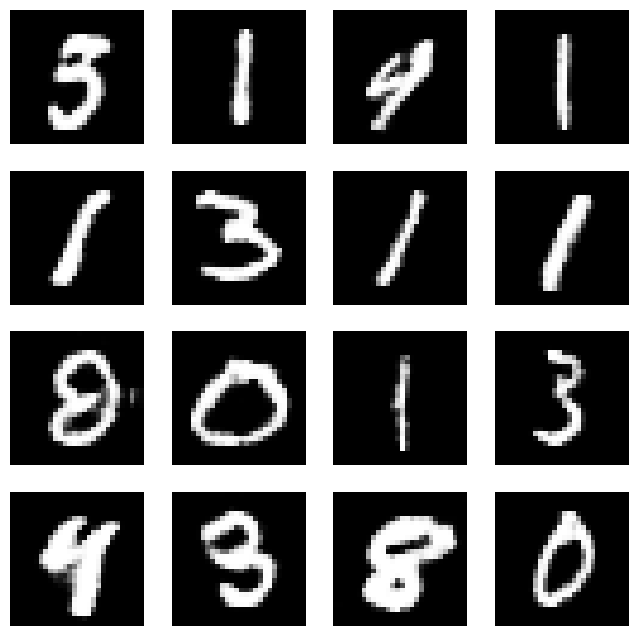

Epoch [15/25], Step [200/938], d_loss: 0.6484, g_loss: 2.1643, D(x): 0.76, D(G(z)): 0.17
Epoch [15/25], Step [400/938], d_loss: 0.8576, g_loss: 2.4580, D(x): 0.68, D(G(z)): 0.19
Epoch [15/25], Step [600/938], d_loss: 0.6630, g_loss: 2.2770, D(x): 0.80, D(G(z)): 0.26
Epoch [15/25], Step [800/938], d_loss: 0.7041, g_loss: 2.3322, D(x): 0.78, D(G(z)): 0.23


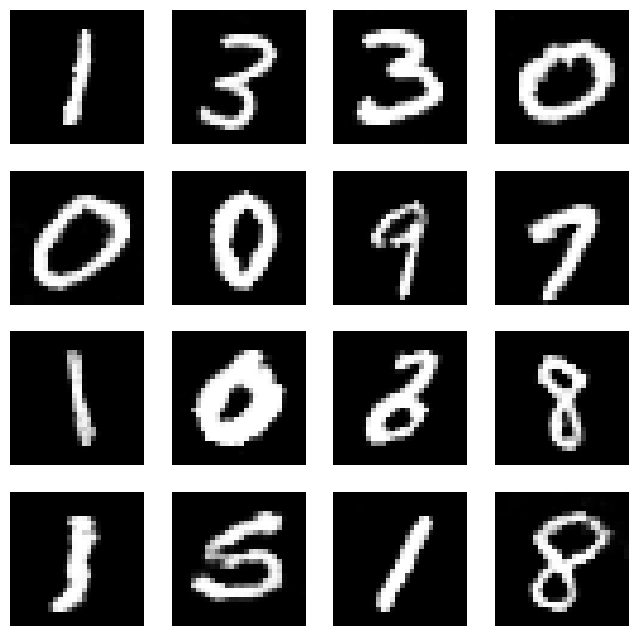

Epoch [16/25], Step [200/938], d_loss: 0.4726, g_loss: 2.8307, D(x): 0.82, D(G(z)): 0.15
Epoch [16/25], Step [400/938], d_loss: 0.5149, g_loss: 2.6296, D(x): 0.77, D(G(z)): 0.13
Epoch [16/25], Step [600/938], d_loss: 0.6693, g_loss: 1.9238, D(x): 0.77, D(G(z)): 0.24
Epoch [16/25], Step [800/938], d_loss: 0.6807, g_loss: 2.3332, D(x): 0.80, D(G(z)): 0.23


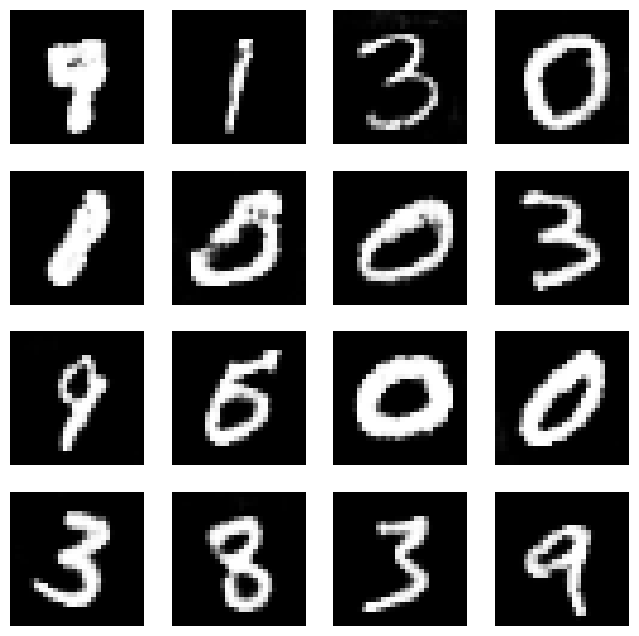

Epoch [17/25], Step [200/938], d_loss: 0.7621, g_loss: 1.7736, D(x): 0.84, D(G(z)): 0.33
Epoch [17/25], Step [400/938], d_loss: 0.6400, g_loss: 1.9095, D(x): 0.85, D(G(z)): 0.27
Epoch [17/25], Step [600/938], d_loss: 0.7616, g_loss: 2.2688, D(x): 0.79, D(G(z)): 0.27
Epoch [17/25], Step [800/938], d_loss: 0.6049, g_loss: 1.9461, D(x): 0.86, D(G(z)): 0.27


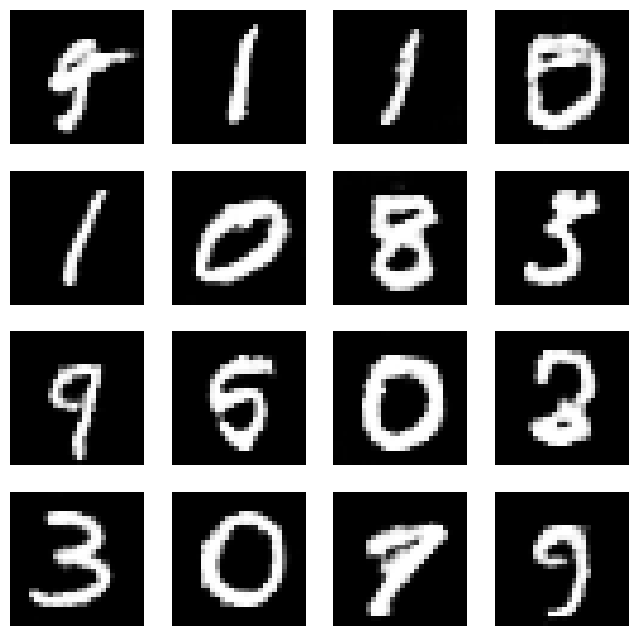

Epoch [18/25], Step [200/938], d_loss: 0.5657, g_loss: 2.2922, D(x): 0.79, D(G(z)): 0.16
Epoch [18/25], Step [400/938], d_loss: 0.7532, g_loss: 1.6262, D(x): 0.73, D(G(z)): 0.22
Epoch [18/25], Step [600/938], d_loss: 0.5699, g_loss: 2.0746, D(x): 0.86, D(G(z)): 0.26
Epoch [18/25], Step [800/938], d_loss: 0.5900, g_loss: 1.7829, D(x): 0.86, D(G(z)): 0.26


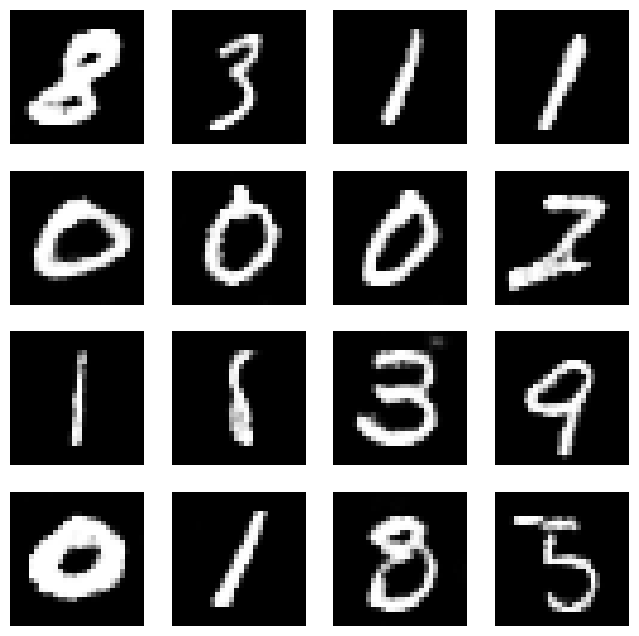

Epoch [19/25], Step [200/938], d_loss: 0.4397, g_loss: 2.7361, D(x): 0.84, D(G(z)): 0.17
Epoch [19/25], Step [400/938], d_loss: 0.5811, g_loss: 1.8772, D(x): 0.85, D(G(z)): 0.26
Epoch [19/25], Step [600/938], d_loss: 0.6357, g_loss: 1.6724, D(x): 0.85, D(G(z)): 0.27
Epoch [19/25], Step [800/938], d_loss: 0.5928, g_loss: 2.0884, D(x): 0.76, D(G(z)): 0.14


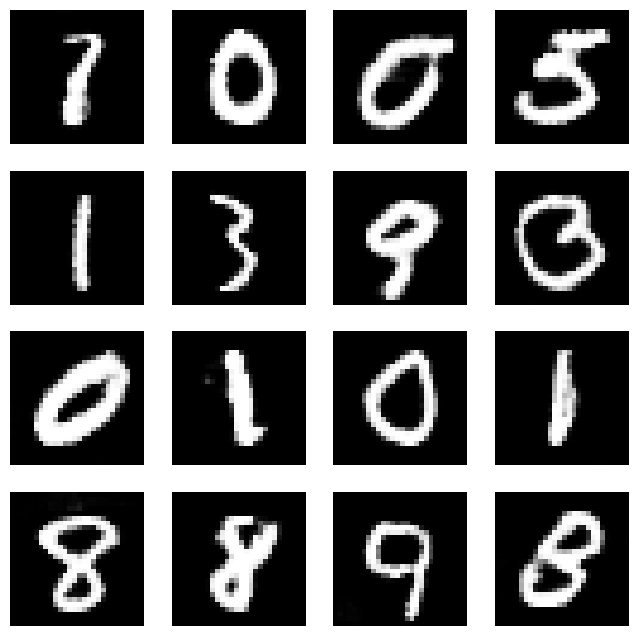

Epoch [20/25], Step [200/938], d_loss: 0.5867, g_loss: 1.7402, D(x): 0.86, D(G(z)): 0.29
Epoch [20/25], Step [400/938], d_loss: 0.4670, g_loss: 2.7266, D(x): 0.80, D(G(z)): 0.10
Epoch [20/25], Step [600/938], d_loss: 0.6258, g_loss: 2.2322, D(x): 0.75, D(G(z)): 0.15
Epoch [20/25], Step [800/938], d_loss: 0.5553, g_loss: 2.6210, D(x): 0.81, D(G(z)): 0.16


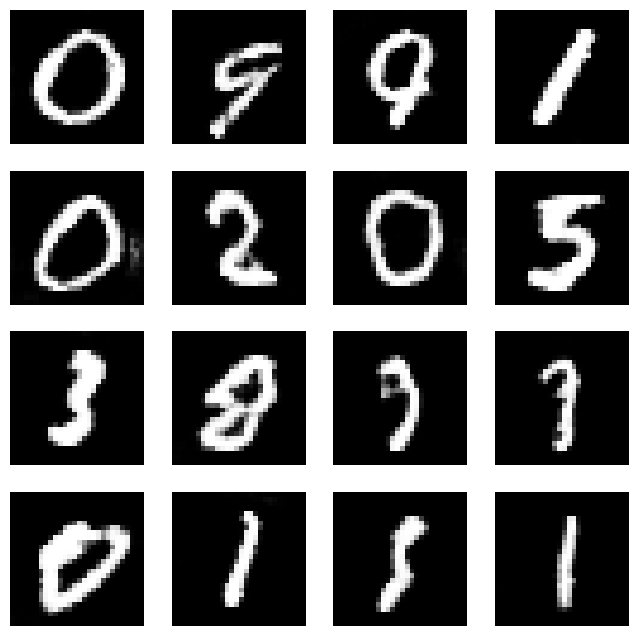

Epoch [21/25], Step [200/938], d_loss: 0.5432, g_loss: 2.8137, D(x): 0.83, D(G(z)): 0.19
Epoch [21/25], Step [400/938], d_loss: 0.5795, g_loss: 2.4168, D(x): 0.79, D(G(z)): 0.14
Epoch [21/25], Step [600/938], d_loss: 0.5248, g_loss: 2.6364, D(x): 0.84, D(G(z)): 0.14
Epoch [21/25], Step [800/938], d_loss: 0.5464, g_loss: 2.5355, D(x): 0.85, D(G(z)): 0.22


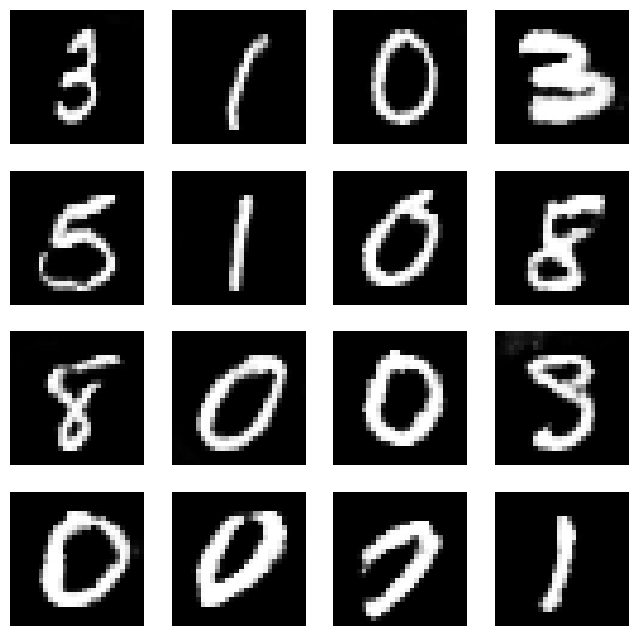

Epoch [22/25], Step [200/938], d_loss: 0.4480, g_loss: 1.9204, D(x): 0.86, D(G(z)): 0.19
Epoch [22/25], Step [400/938], d_loss: 0.4863, g_loss: 2.2703, D(x): 0.87, D(G(z)): 0.22
Epoch [22/25], Step [600/938], d_loss: 0.6475, g_loss: 1.5553, D(x): 0.92, D(G(z)): 0.31
Epoch [22/25], Step [800/938], d_loss: 0.5720, g_loss: 1.7366, D(x): 0.77, D(G(z)): 0.13


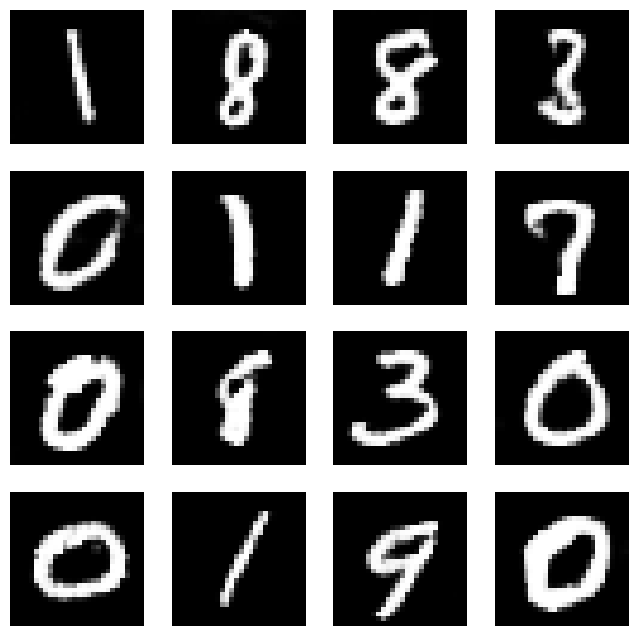

Epoch [23/25], Step [200/938], d_loss: 0.5674, g_loss: 2.5053, D(x): 0.85, D(G(z)): 0.24
Epoch [23/25], Step [400/938], d_loss: 0.5681, g_loss: 2.4713, D(x): 0.86, D(G(z)): 0.24
Epoch [23/25], Step [600/938], d_loss: 0.5035, g_loss: 2.4537, D(x): 0.84, D(G(z)): 0.17
Epoch [23/25], Step [800/938], d_loss: 0.4190, g_loss: 3.5197, D(x): 0.85, D(G(z)): 0.13


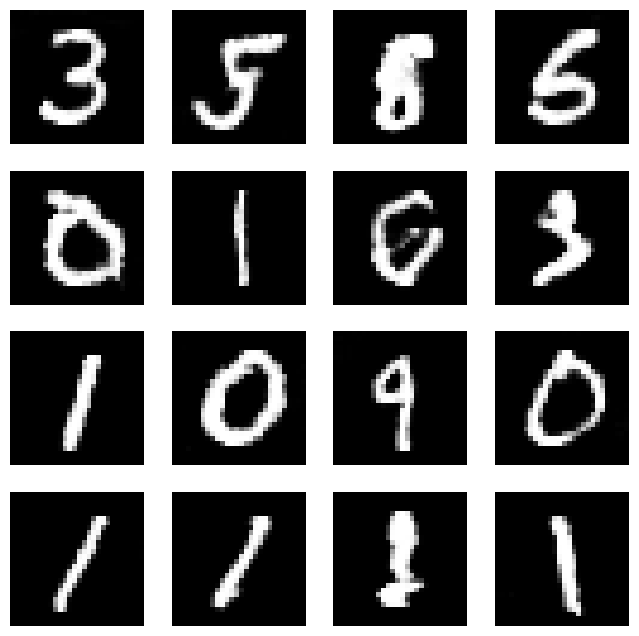

Epoch [24/25], Step [200/938], d_loss: 0.6545, g_loss: 1.6039, D(x): 0.89, D(G(z)): 0.32
Epoch [24/25], Step [400/938], d_loss: 0.5197, g_loss: 2.6195, D(x): 0.77, D(G(z)): 0.09
Epoch [24/25], Step [600/938], d_loss: 0.5099, g_loss: 2.1126, D(x): 0.88, D(G(z)): 0.26
Epoch [24/25], Step [800/938], d_loss: 0.5819, g_loss: 1.9237, D(x): 0.78, D(G(z)): 0.16


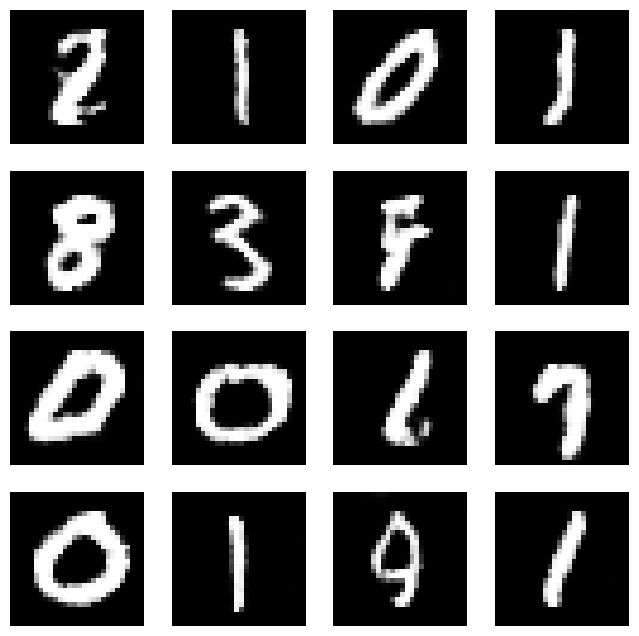

Epoch [25/25], Step [200/938], d_loss: 0.5615, g_loss: 2.2347, D(x): 0.84, D(G(z)): 0.21
Epoch [25/25], Step [400/938], d_loss: 0.4002, g_loss: 2.7710, D(x): 0.86, D(G(z)): 0.13
Epoch [25/25], Step [600/938], d_loss: 0.3414, g_loss: 2.6374, D(x): 0.91, D(G(z)): 0.17
Epoch [25/25], Step [800/938], d_loss: 0.4943, g_loss: 1.9185, D(x): 0.91, D(G(z)): 0.26


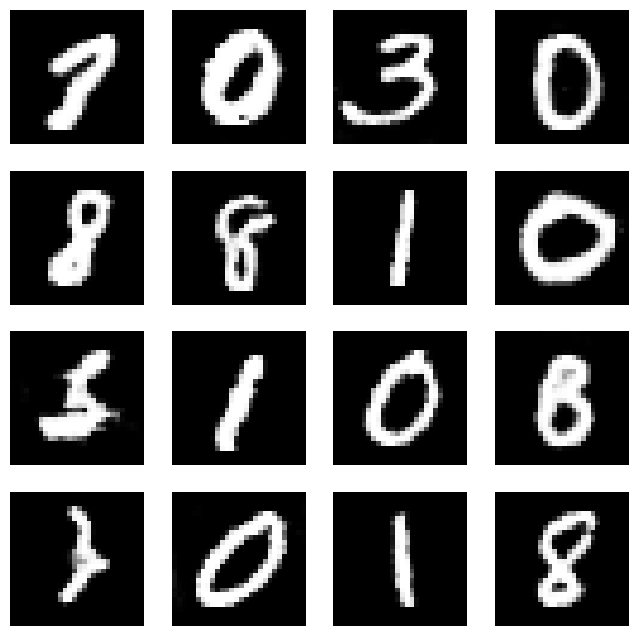

In [86]:

if torch.backends.mps.is_available():
    device = torch.device("mps")
    x = torch.ones(1, device=device)
    print (x)
else:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print ("MPS device not found.")
D = Discriminator().to(device)
G = Generator().to(device)

# loss function and optimizer
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=learning_rate)
g_optimizer = torch.optim.Adam(G.parameters(), lr=learning_rate)

# train model
D.train()
G.train()
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        images = images.to(device)
        real_labels = torch.ones(images.size(0), 1).to(device)
        fake_labels = torch.zeros(images.size(0), 1).to(device)
        
        # train discriminator
        d_optimizer.zero_grad()
        outputs = D(images)
        d_loss_real = criterion(outputs, real_labels)
        d_loss_real.backward()
        real_score = outputs.mean().item()
        
        z = torch.randn(images.size(0), z_dim).to(device)
        fake_images = G(z)
        outputs = D(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        d_loss_fake.backward()
        fake_score = outputs.mean().item()
        
        d_loss = d_loss_real + d_loss_fake
        d_optimizer.step()
        
        # train generator
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        outputs = D(fake_images)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        g_optimizer.step()
        
        if (i+1) % 200 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, D(x): {real_score:.2f}, D(G(z)): {fake_score:.2f}')
    
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
        
    plt.figure(figsize=(8, 8))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(fake_images[i].squeeze().cpu().detach().numpy(), cmap='gray')
        plt.axis('off')
    plt.show()
    # save fake images
    torchvision.utils.save_image(fake_images, f'./data/fake_images_with_cnn-{epoch+1}.png', nrow=4, normalize=True)
        

<div dir="rtl">
<p> به وضوح مشخص است که بعد از هر ایپاک تصاویر تولید شده بهتر می شوند </p>
<p> همانطور که دربالا اشاره شد مقدار لاس دو شبکه به ضورت معکوس زیاد و کم میشوند </p>


</div>

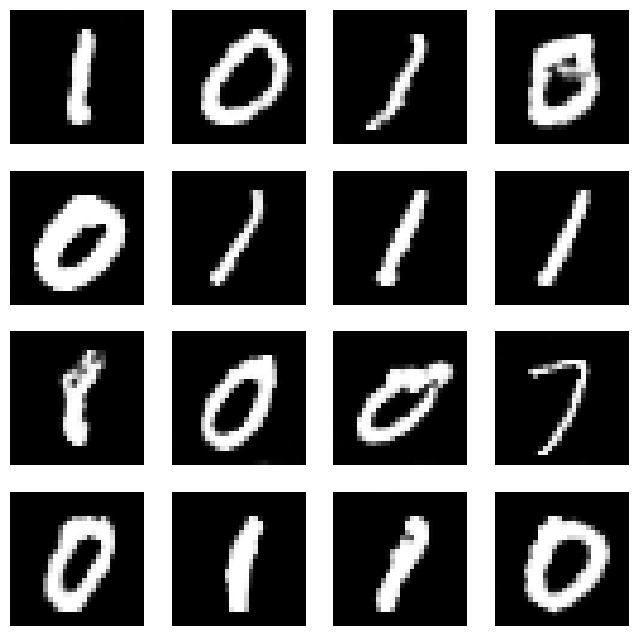

In [87]:

# test model
D.eval()
G.eval()
z = torch.randn(16, z_dim).to(device)
fake_images = G(z)
fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(fake_images[i].squeeze().cpu().detach().numpy(), cmap='gray')
    plt.axis('off')
plt.show()

<div dir="rtl">
<p> خروجی مدل برای ۱۶ تصویر تولید شده به صورت بالا است </p>
</div>

<div dir="rtl">
<p> حال هایپرپارامترهارا برای معماری دوم تعریف می کنیم </p>
<p> این معماری بدون استفاده از لایه های کانولوشنالی است </p>
<p> ولی مانند معماری قبل است </p>


</div>

<div dir="rtl">
<p> در این مدل همانند مدل قبل دو از باینری کراس اینتروپی برای تابع لاس و از آدام برای اپتیمایزر استفاده می کنیم </p>


In [94]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
num_epochs = 100

<div dir="rtl">
<p> در لایه های این مدل از leakeyrelu برای فعال سازی استفاده می کنیم </p>
<p> و برای اکتیویشن لایه آخر از سیگموید استفاده می کنیم که خروجی بین ۰ و ۱ باشد که احتمال واقعی بودن یا نبودن تصویر را نشان دهد </p>
<p> برای مولد از اکتیویشن تانژانت اچ استفاده می کنیم که داده هارا به بازه -۱ تا ۱ ببرد </p>

</div>

In [95]:
# make GAN model
class Discriminator_linear(nn.Module):
    def __init__(self):
        super(Discriminator_linear, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.model(x)
    
class Generator_linear(nn.Module):
    def __init__(self):
        super(Generator_linear, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 784),
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.model(x)
    
D = Discriminator_linear()
G = Generator_linear()

In [96]:
# loss and optimizer
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=learning_rate)
g_optimizer = torch.optim.Adam(G.parameters(), lr=learning_rate)



<div dir="rtl">
<p> توجه شود که در این مدل نیز مانند مدل قبل قبل از بکوارد زدن روی گرادیان ها باید آنها را صفر کنیم </p>
<p> برای تشحیض دهنده قبل از بکوارد زدن روی گرادیان ها یکبار آن را صفر می کنیم </p>
<p> برای مولد چون گراف محاسباتی آن به تشخیص دهنده وابسته است ابتدا گرادیان های تشخیص دهنده را صفر می کنیم </p>

</div>

Epoch [0/100], Step [200/938], d_loss: 0.9291, g_loss: 1.2544, D(x): 0.80, D(G(z)): 0.50
Epoch [0/100], Step [400/938], d_loss: 0.2580, g_loss: 3.3688, D(x): 0.89, D(G(z)): 0.12
Epoch [0/100], Step [600/938], d_loss: 0.5811, g_loss: 2.6220, D(x): 0.83, D(G(z)): 0.22
Epoch [0/100], Step [800/938], d_loss: 0.1424, g_loss: 3.2801, D(x): 0.96, D(G(z)): 0.08
Epoch [1/100], Step [200/938], d_loss: 1.4542, g_loss: 1.7242, D(x): 0.63, D(G(z)): 0.41
Epoch [1/100], Step [400/938], d_loss: 0.4563, g_loss: 1.8055, D(x): 0.83, D(G(z)): 0.19
Epoch [1/100], Step [600/938], d_loss: 0.7369, g_loss: 2.5300, D(x): 0.70, D(G(z)): 0.18
Epoch [1/100], Step [800/938], d_loss: 0.1738, g_loss: 4.0052, D(x): 0.96, D(G(z)): 0.11
Epoch [2/100], Step [200/938], d_loss: 0.3420, g_loss: 3.2552, D(x): 0.87, D(G(z)): 0.12
Epoch [2/100], Step [400/938], d_loss: 0.3714, g_loss: 3.1648, D(x): 0.87, D(G(z)): 0.16
Epoch [2/100], Step [600/938], d_loss: 0.5836, g_loss: 2.7642, D(x): 0.75, D(G(z)): 0.14
Epoch [2/100], Step [

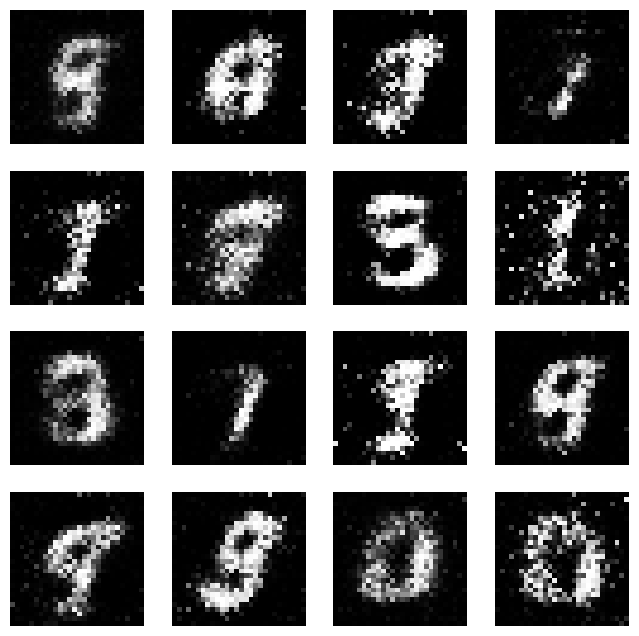

Epoch [10/100], Step [200/938], d_loss: 0.6404, g_loss: 3.1920, D(x): 0.80, D(G(z)): 0.20
Epoch [10/100], Step [400/938], d_loss: 0.4814, g_loss: 3.3352, D(x): 0.82, D(G(z)): 0.14
Epoch [10/100], Step [600/938], d_loss: 1.0100, g_loss: 2.1522, D(x): 0.71, D(G(z)): 0.31
Epoch [10/100], Step [800/938], d_loss: 0.6864, g_loss: 1.8501, D(x): 0.82, D(G(z)): 0.22
Epoch [11/100], Step [200/938], d_loss: 0.4567, g_loss: 2.6385, D(x): 0.83, D(G(z)): 0.16
Epoch [11/100], Step [400/938], d_loss: 0.5197, g_loss: 3.3182, D(x): 0.77, D(G(z)): 0.10
Epoch [11/100], Step [600/938], d_loss: 0.6781, g_loss: 2.2100, D(x): 0.89, D(G(z)): 0.32
Epoch [11/100], Step [800/938], d_loss: 0.6921, g_loss: 3.0268, D(x): 0.82, D(G(z)): 0.24
Epoch [12/100], Step [200/938], d_loss: 0.9401, g_loss: 2.0898, D(x): 0.84, D(G(z)): 0.36
Epoch [12/100], Step [400/938], d_loss: 0.9598, g_loss: 2.4496, D(x): 0.61, D(G(z)): 0.11
Epoch [12/100], Step [600/938], d_loss: 0.7609, g_loss: 2.5809, D(x): 0.69, D(G(z)): 0.13
Epoch [12/

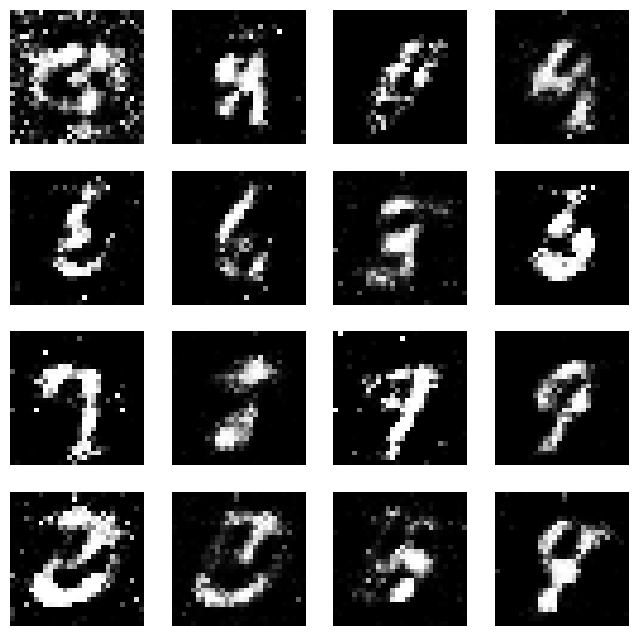

Epoch [20/100], Step [200/938], d_loss: 0.9669, g_loss: 2.5245, D(x): 0.65, D(G(z)): 0.17
Epoch [20/100], Step [400/938], d_loss: 0.9112, g_loss: 1.9885, D(x): 0.82, D(G(z)): 0.40
Epoch [20/100], Step [600/938], d_loss: 0.7179, g_loss: 2.1401, D(x): 0.79, D(G(z)): 0.24
Epoch [20/100], Step [800/938], d_loss: 0.6174, g_loss: 2.3166, D(x): 0.78, D(G(z)): 0.17
Epoch [21/100], Step [200/938], d_loss: 0.7386, g_loss: 2.7489, D(x): 0.67, D(G(z)): 0.10
Epoch [21/100], Step [400/938], d_loss: 0.6042, g_loss: 3.2358, D(x): 0.78, D(G(z)): 0.18
Epoch [21/100], Step [600/938], d_loss: 0.9420, g_loss: 2.0346, D(x): 0.71, D(G(z)): 0.27
Epoch [21/100], Step [800/938], d_loss: 0.6040, g_loss: 2.2554, D(x): 0.81, D(G(z)): 0.21
Epoch [22/100], Step [200/938], d_loss: 0.9397, g_loss: 1.8425, D(x): 0.71, D(G(z)): 0.26
Epoch [22/100], Step [400/938], d_loss: 0.6516, g_loss: 2.4669, D(x): 0.81, D(G(z)): 0.25
Epoch [22/100], Step [600/938], d_loss: 0.7900, g_loss: 1.5673, D(x): 0.76, D(G(z)): 0.29
Epoch [22/

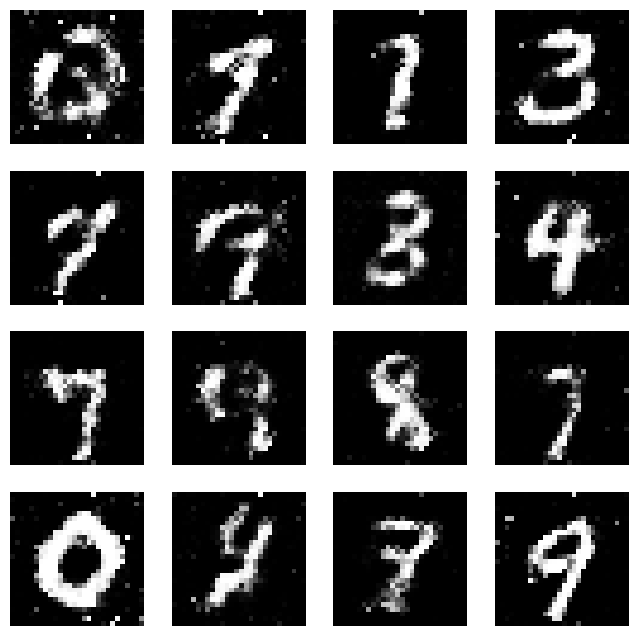

Epoch [30/100], Step [200/938], d_loss: 0.8316, g_loss: 2.2588, D(x): 0.82, D(G(z)): 0.35
Epoch [30/100], Step [400/938], d_loss: 0.7555, g_loss: 2.4150, D(x): 0.80, D(G(z)): 0.28
Epoch [30/100], Step [600/938], d_loss: 0.9745, g_loss: 1.7825, D(x): 0.69, D(G(z)): 0.26
Epoch [30/100], Step [800/938], d_loss: 0.7188, g_loss: 2.1936, D(x): 0.83, D(G(z)): 0.32
Epoch [31/100], Step [200/938], d_loss: 0.8680, g_loss: 2.3758, D(x): 0.69, D(G(z)): 0.23
Epoch [31/100], Step [400/938], d_loss: 0.8337, g_loss: 2.0662, D(x): 0.72, D(G(z)): 0.22
Epoch [31/100], Step [600/938], d_loss: 0.9052, g_loss: 2.0442, D(x): 0.79, D(G(z)): 0.32
Epoch [31/100], Step [800/938], d_loss: 0.7100, g_loss: 1.6989, D(x): 0.72, D(G(z)): 0.20
Epoch [32/100], Step [200/938], d_loss: 0.8307, g_loss: 1.7587, D(x): 0.73, D(G(z)): 0.28
Epoch [32/100], Step [400/938], d_loss: 0.8200, g_loss: 1.8419, D(x): 0.81, D(G(z)): 0.36
Epoch [32/100], Step [600/938], d_loss: 0.8506, g_loss: 1.8337, D(x): 0.70, D(G(z)): 0.22
Epoch [32/

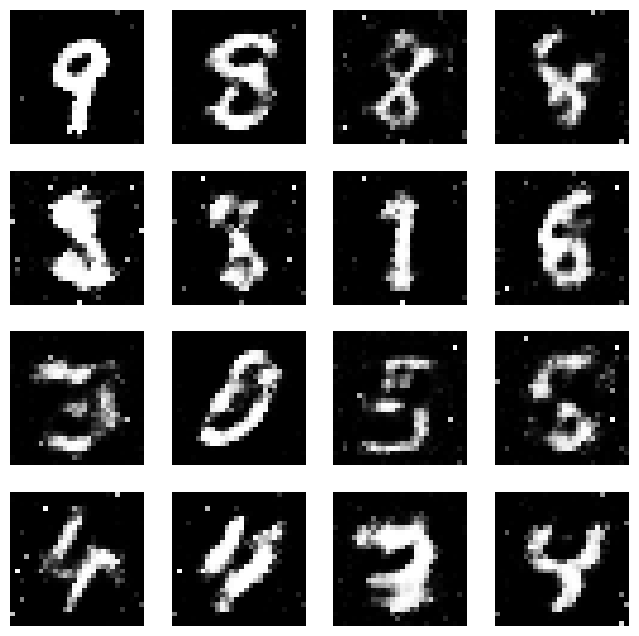

Epoch [40/100], Step [200/938], d_loss: 0.9626, g_loss: 1.9828, D(x): 0.68, D(G(z)): 0.29
Epoch [40/100], Step [400/938], d_loss: 0.7052, g_loss: 1.9638, D(x): 0.75, D(G(z)): 0.21
Epoch [40/100], Step [600/938], d_loss: 0.8758, g_loss: 1.8567, D(x): 0.76, D(G(z)): 0.33
Epoch [40/100], Step [800/938], d_loss: 0.7209, g_loss: 2.3521, D(x): 0.73, D(G(z)): 0.21
Epoch [41/100], Step [200/938], d_loss: 0.8097, g_loss: 2.0734, D(x): 0.72, D(G(z)): 0.20
Epoch [41/100], Step [400/938], d_loss: 0.7739, g_loss: 1.5651, D(x): 0.75, D(G(z)): 0.28
Epoch [41/100], Step [600/938], d_loss: 0.6794, g_loss: 1.5790, D(x): 0.77, D(G(z)): 0.23
Epoch [41/100], Step [800/938], d_loss: 0.9588, g_loss: 2.0285, D(x): 0.72, D(G(z)): 0.31
Epoch [42/100], Step [200/938], d_loss: 0.8127, g_loss: 1.9396, D(x): 0.72, D(G(z)): 0.27
Epoch [42/100], Step [400/938], d_loss: 0.6998, g_loss: 1.8620, D(x): 0.76, D(G(z)): 0.26
Epoch [42/100], Step [600/938], d_loss: 0.7838, g_loss: 1.6292, D(x): 0.84, D(G(z)): 0.33
Epoch [42/

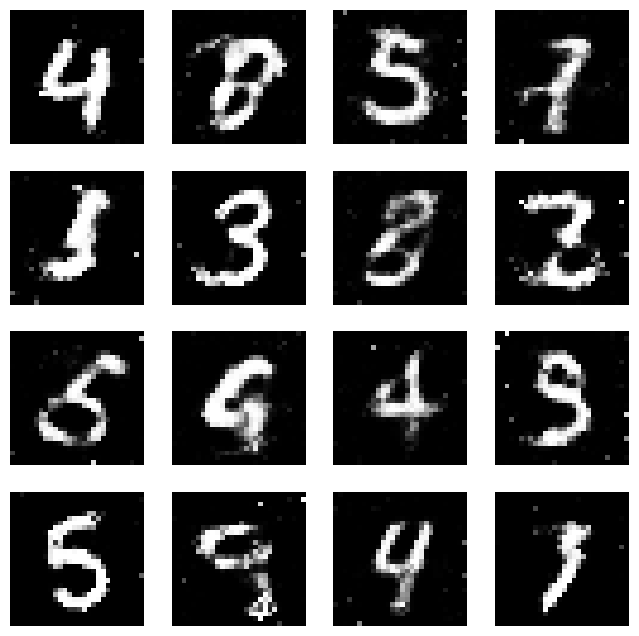

Epoch [50/100], Step [200/938], d_loss: 0.8599, g_loss: 1.5887, D(x): 0.82, D(G(z)): 0.37
Epoch [50/100], Step [400/938], d_loss: 0.8226, g_loss: 1.8253, D(x): 0.78, D(G(z)): 0.33
Epoch [50/100], Step [600/938], d_loss: 0.7289, g_loss: 1.7610, D(x): 0.77, D(G(z)): 0.26
Epoch [50/100], Step [800/938], d_loss: 1.0301, g_loss: 1.7279, D(x): 0.72, D(G(z)): 0.37
Epoch [51/100], Step [200/938], d_loss: 0.8921, g_loss: 1.9351, D(x): 0.64, D(G(z)): 0.19
Epoch [51/100], Step [400/938], d_loss: 0.7640, g_loss: 1.7051, D(x): 0.75, D(G(z)): 0.28
Epoch [51/100], Step [600/938], d_loss: 0.8253, g_loss: 1.7627, D(x): 0.80, D(G(z)): 0.33
Epoch [51/100], Step [800/938], d_loss: 0.8715, g_loss: 1.4028, D(x): 0.68, D(G(z)): 0.25
Epoch [52/100], Step [200/938], d_loss: 0.7085, g_loss: 1.9459, D(x): 0.78, D(G(z)): 0.25
Epoch [52/100], Step [400/938], d_loss: 0.8246, g_loss: 2.0936, D(x): 0.70, D(G(z)): 0.27
Epoch [52/100], Step [600/938], d_loss: 0.7275, g_loss: 1.9517, D(x): 0.71, D(G(z)): 0.19
Epoch [52/

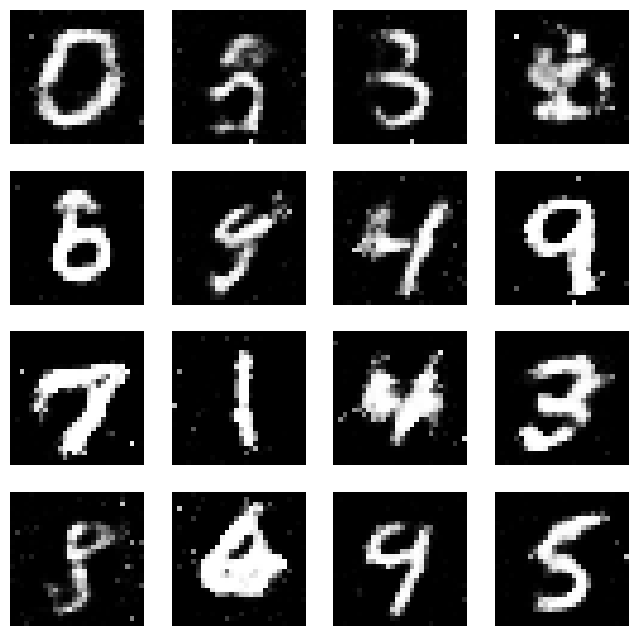

Epoch [60/100], Step [200/938], d_loss: 0.7281, g_loss: 1.5003, D(x): 0.80, D(G(z)): 0.29
Epoch [60/100], Step [400/938], d_loss: 0.8414, g_loss: 1.6967, D(x): 0.73, D(G(z)): 0.26
Epoch [60/100], Step [600/938], d_loss: 0.9161, g_loss: 1.3770, D(x): 0.63, D(G(z)): 0.21
Epoch [60/100], Step [800/938], d_loss: 0.9512, g_loss: 1.1288, D(x): 0.76, D(G(z)): 0.34
Epoch [61/100], Step [200/938], d_loss: 0.8575, g_loss: 1.8418, D(x): 0.69, D(G(z)): 0.23
Epoch [61/100], Step [400/938], d_loss: 0.8318, g_loss: 1.1059, D(x): 0.81, D(G(z)): 0.37
Epoch [61/100], Step [600/938], d_loss: 0.8340, g_loss: 2.1408, D(x): 0.75, D(G(z)): 0.30
Epoch [61/100], Step [800/938], d_loss: 0.9571, g_loss: 1.8357, D(x): 0.73, D(G(z)): 0.33
Epoch [62/100], Step [200/938], d_loss: 0.6313, g_loss: 2.2715, D(x): 0.77, D(G(z)): 0.23
Epoch [62/100], Step [400/938], d_loss: 0.7148, g_loss: 2.2113, D(x): 0.79, D(G(z)): 0.29
Epoch [62/100], Step [600/938], d_loss: 0.9080, g_loss: 1.4802, D(x): 0.76, D(G(z)): 0.36
Epoch [62/

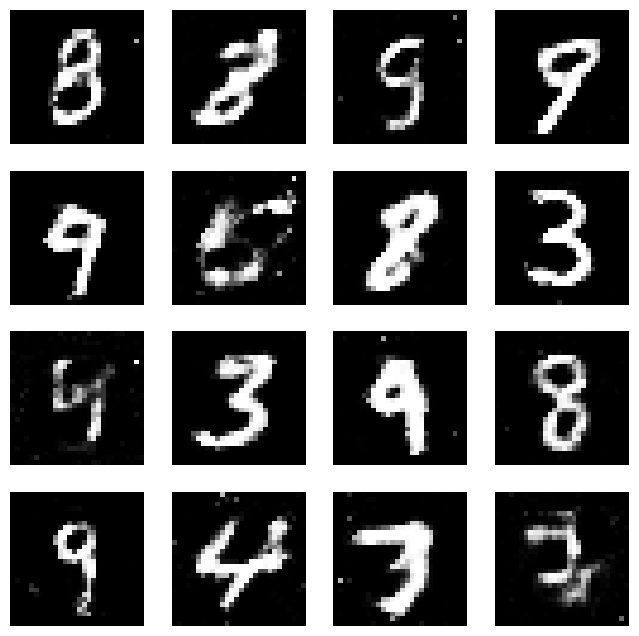

Epoch [70/100], Step [200/938], d_loss: 0.8291, g_loss: 2.1656, D(x): 0.73, D(G(z)): 0.31
Epoch [70/100], Step [400/938], d_loss: 0.9981, g_loss: 2.1003, D(x): 0.65, D(G(z)): 0.27
Epoch [70/100], Step [600/938], d_loss: 0.8923, g_loss: 1.8050, D(x): 0.77, D(G(z)): 0.33
Epoch [70/100], Step [800/938], d_loss: 0.6775, g_loss: 1.8795, D(x): 0.74, D(G(z)): 0.23
Epoch [71/100], Step [200/938], d_loss: 0.8923, g_loss: 1.9967, D(x): 0.60, D(G(z)): 0.15
Epoch [71/100], Step [400/938], d_loss: 0.8303, g_loss: 1.6828, D(x): 0.71, D(G(z)): 0.28
Epoch [71/100], Step [600/938], d_loss: 0.9337, g_loss: 2.1883, D(x): 0.66, D(G(z)): 0.23
Epoch [71/100], Step [800/938], d_loss: 0.8404, g_loss: 1.5765, D(x): 0.72, D(G(z)): 0.28
Epoch [72/100], Step [200/938], d_loss: 0.8023, g_loss: 1.9136, D(x): 0.68, D(G(z)): 0.24
Epoch [72/100], Step [400/938], d_loss: 0.8236, g_loss: 2.4370, D(x): 0.69, D(G(z)): 0.22
Epoch [72/100], Step [600/938], d_loss: 0.8436, g_loss: 1.7293, D(x): 0.75, D(G(z)): 0.33
Epoch [72/

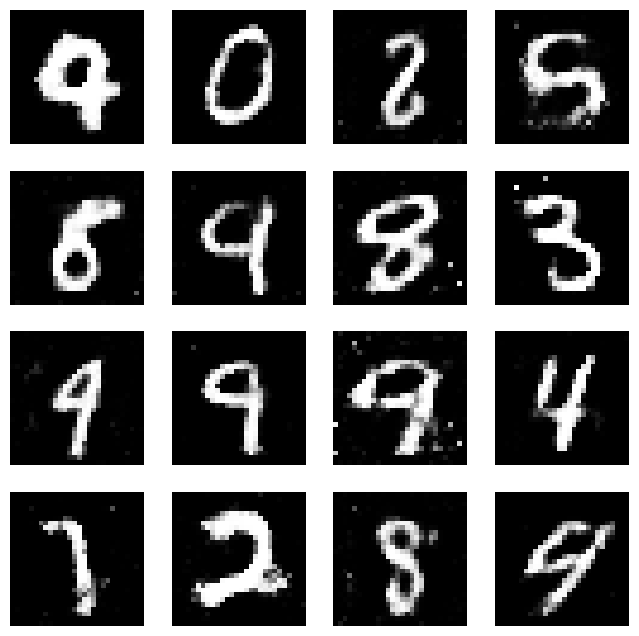

Epoch [80/100], Step [200/938], d_loss: 0.9979, g_loss: 1.7587, D(x): 0.68, D(G(z)): 0.30
Epoch [80/100], Step [400/938], d_loss: 0.7913, g_loss: 2.2734, D(x): 0.66, D(G(z)): 0.19
Epoch [80/100], Step [600/938], d_loss: 1.0077, g_loss: 1.7481, D(x): 0.75, D(G(z)): 0.38
Epoch [80/100], Step [800/938], d_loss: 1.0467, g_loss: 1.1680, D(x): 0.78, D(G(z)): 0.44
Epoch [81/100], Step [200/938], d_loss: 0.7912, g_loss: 2.4670, D(x): 0.72, D(G(z)): 0.28
Epoch [81/100], Step [400/938], d_loss: 0.9469, g_loss: 1.7100, D(x): 0.72, D(G(z)): 0.34
Epoch [81/100], Step [600/938], d_loss: 0.9347, g_loss: 2.1601, D(x): 0.64, D(G(z)): 0.23
Epoch [81/100], Step [800/938], d_loss: 0.7943, g_loss: 1.3477, D(x): 0.72, D(G(z)): 0.23
Epoch [82/100], Step [200/938], d_loss: 0.8571, g_loss: 1.3460, D(x): 0.81, D(G(z)): 0.37
Epoch [82/100], Step [400/938], d_loss: 0.7613, g_loss: 2.0727, D(x): 0.72, D(G(z)): 0.23
Epoch [82/100], Step [600/938], d_loss: 0.8064, g_loss: 2.0035, D(x): 0.69, D(G(z)): 0.24
Epoch [82/

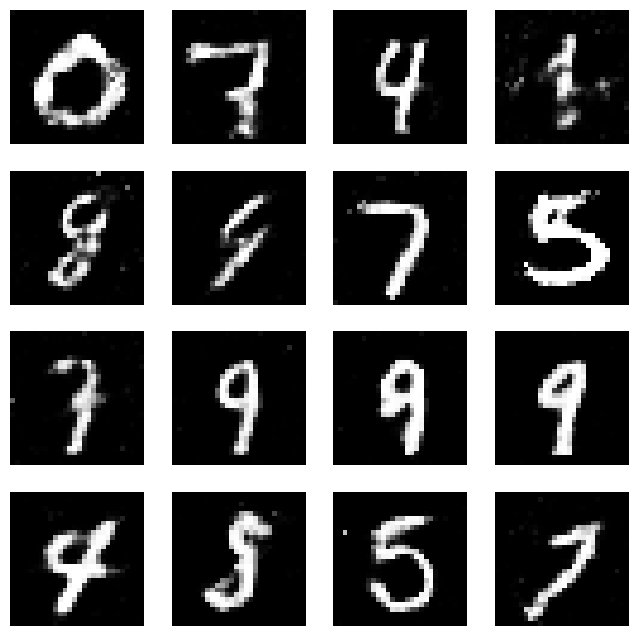

Epoch [90/100], Step [200/938], d_loss: 0.8172, g_loss: 1.5275, D(x): 0.69, D(G(z)): 0.20
Epoch [90/100], Step [400/938], d_loss: 0.9214, g_loss: 1.3460, D(x): 0.76, D(G(z)): 0.32
Epoch [90/100], Step [600/938], d_loss: 0.4955, g_loss: 2.0811, D(x): 0.79, D(G(z)): 0.16
Epoch [90/100], Step [800/938], d_loss: 0.8625, g_loss: 1.9899, D(x): 0.69, D(G(z)): 0.28
Epoch [91/100], Step [200/938], d_loss: 0.7071, g_loss: 1.7503, D(x): 0.73, D(G(z)): 0.22
Epoch [91/100], Step [400/938], d_loss: 0.7937, g_loss: 1.6864, D(x): 0.77, D(G(z)): 0.27
Epoch [91/100], Step [600/938], d_loss: 0.8642, g_loss: 1.8376, D(x): 0.63, D(G(z)): 0.18
Epoch [91/100], Step [800/938], d_loss: 0.8496, g_loss: 1.5081, D(x): 0.73, D(G(z)): 0.28
Epoch [92/100], Step [200/938], d_loss: 0.9724, g_loss: 1.6347, D(x): 0.72, D(G(z)): 0.31
Epoch [92/100], Step [400/938], d_loss: 0.7830, g_loss: 1.9827, D(x): 0.71, D(G(z)): 0.20
Epoch [92/100], Step [600/938], d_loss: 0.7645, g_loss: 2.4978, D(x): 0.76, D(G(z)): 0.25
Epoch [92/

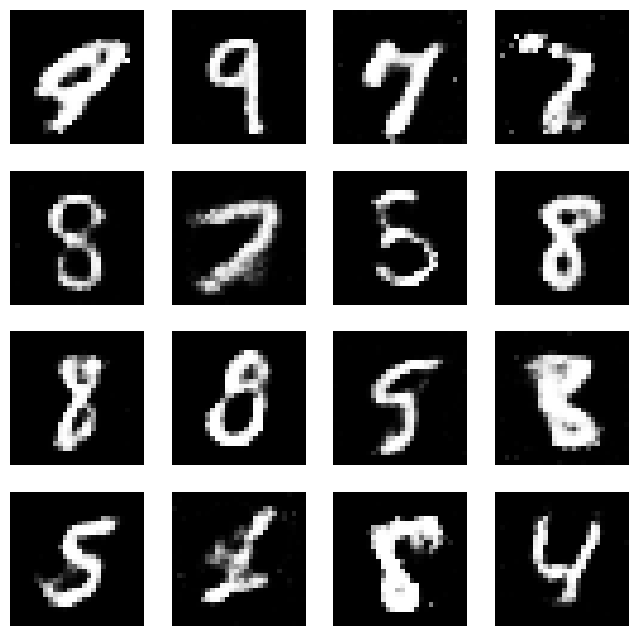

In [97]:
# train
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        real_labels = torch.ones(images.size(0), 1)
        fake_labels = torch.zeros(images.size(0), 1)
        
        # train discriminator
        real_images = images.view(images.size(0), -1)
        real_outputs = D(real_images)
        d_loss_real = criterion(real_outputs, real_labels)
        real_score = real_outputs
        
        z = torch.randn(images.size(0), z_dim)
        fake_images = G(z)
        fake_outputs = D(fake_images)
        d_loss_fake = criterion(fake_outputs, fake_labels)
        fake_score = fake_outputs
        
        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        
        # train generator
        z = torch.randn(images.size(0), z_dim)
        fake_images = G(z)
        outputs = D(fake_images)
        g_loss = criterion(outputs, real_labels)
        
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        
        if (i+1) % 200 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}'
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(),
                          real_score.mean().item(), fake_score.mean().item()))
    
    # for every epoch, save the fake images
    if (epoch+1) % 10 == 0:
        fake_images = fake_images.view(fake_images.size(0), 1, 28, 28)
        torchvision.utils.save_image(fake_images, './data/fake_images-{}.png'.format(epoch+1))
        plt.figure(figsize=(8, 8))
        for i in range(16):
            plt.subplot(4, 4, i+1)
            plt.imshow(fake_images[i].squeeze().cpu().detach().numpy(), cmap='gray')
            plt.axis('off')
        plt.show()
    
    
            

<div dir="rtl">
<p> به وضوح مشخص است که بعد از هر ایپاک تصاویر تولید شده بهتر می شوند </p>
<p> این دو شبکه در این معماری بسیار سریع تر اموزش میبینند ولی با تعداد ایپاک های بیشتری به نتیجه میرسند </p>

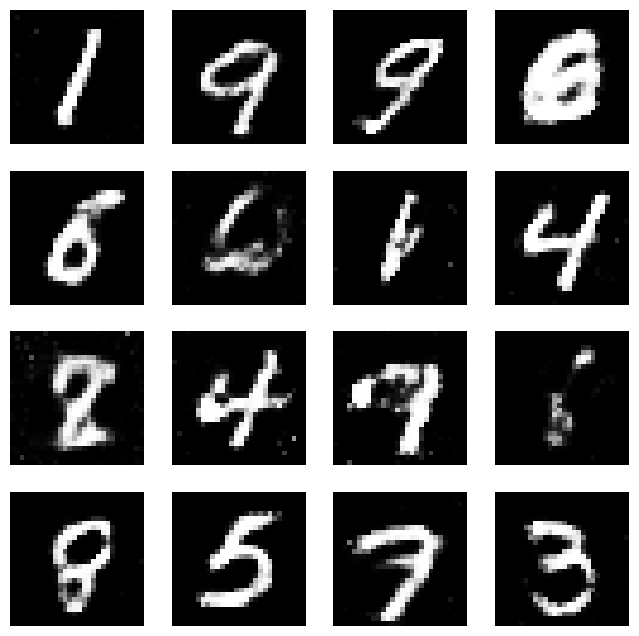

In [98]:

# test
z = torch.randn(16, z_dim)
fake_images = G(z)
fake_images = fake_images.view(fake_images.size(0), 1, 28, 28)
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(fake_images[i].squeeze().detach().numpy(), cmap='gray')
    plt.axis('off')
plt.show()

<div dir="rtl">
<p> خروجی مدل برای ۱۶ تصویر تولید شده به صورت بالا است </p>